In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [185]:
df = pd.read_csv("data1.csv")

In [186]:
X = df.iloc[:,0]
y = df.iloc[:,-1]

Split into train test and test set

In [187]:
def train_test_split(x,y,rate):
    xTrain = x[:int(round((len(x)*rate),2))]
    yTrain = y[:int(round((len(y)*rate),2))]
    xTest =  x[int(round((len(x)*rate),2)):]
    yTest = x[int(round((len(x)*rate),2)):]
    return xTrain,xTest,yTrain,yTest

In [188]:
xTrain,xTest,yTrain,yTest = train_test_split(X,y,0.3)

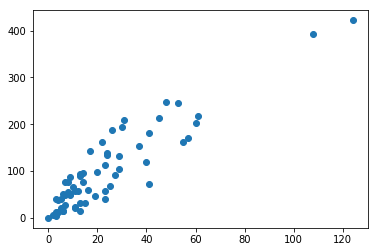

In [189]:
plt.scatter(X,y)

coding linear regression model

In [481]:
def linearRegression(x,y):
    #calculate coefficients m and b
    n = 0
    d = 0
    x = np.array(x)
    y = np.array(y)
    xBar = np.sum(x)/x.size
    yBar = np.sum(y)/y.size
    for i,z in zip(x,y):
        n += (i-xBar)*(z-yBar)
        d += (i-xBar)**2
        m = n/d
        b = yBar -m*xBar
        b = round(b,2)
    return m,b

return two coefficients m and b

In [396]:
m,b = linearRegression(xTrain,yTrain)

predict the model

In [397]:
regressionLine = [m*i+b for i in xTrain]

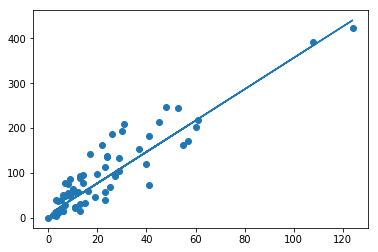

In [398]:
plt.scatter(X,y)
plt.plot(xTrain,regressionLine)
plt.show()

calculate the rSquare

In [392]:
def sumSquared(y,yInput):
    return np.sum((y-yInput)**2)

In [393]:
def rSquared(y,yhat):
    yBar = np.sum(y)/y.size
    squareYHat = sumSquared(y,yhat)
    squareYBar = sumSquared(y,yBar)
    return 1-(squareYHat/squareYBar)

In [404]:
rSquared(yTrain,regressionLine)

0.9255973222338596

Use gradient descent to find the optimal point

In [469]:
def GD(mCurrent,bCurrent,learningRates):
    for i,z in zip(xTrain,yTrain):
        yhat = mCurrent*i +bCurrent
        error = sumSquared(z,yhat)
        mCurrent += error*i*learningRates/xTrain.size
        bCurrent += error*learningRates/xTrain.size
    return mCurrent,bCurrent

In [470]:
GD(m,b,0.000000005)

(3.490608869731127, 7.390005518910726)

In [471]:
mNew,bNew=GD(m,b,0.0000005)

In [478]:
newRegression = [mNew*i +bNew for i in X]

predict new data points from the above algorithm 

In [480]:
newRegression 

[386.4244643164319,
 74.0724423416581,
 53.01500265796549,
 442.57763680627886,
 147.77348123458228,
 207.43622700504469,
 88.11073546411986,
 56.52457593858093,
 165.32134763765944,
 42.486282816119186,
 24.938416413042006,
 175.85006747950575,
 45.99585609673462,
 88.11073546411986,
 31.95756297427288,
 14.409696571195699,
 91.62030874473528,
 28.44798969365744,
 17.919269851811134,
 88.11073546411986,
 28.44798969365744,
 38.97670953550375,
 38.97670953550375,
 17.919269851811134,
 109.16817514781246,
 31.95756297427288,
 21.42884313242657,
 77.58201562227354,
 31.95756297427288,
 21.42884313242657,
 7.390550009964827,
 95.12988202535072,
 28.44798969365744,
 24.938416413042006,
 84.60116218350441,
 45.99585609673462,
 221.47452012750642,
 49.505429377350055,
 21.42884313242657,
 63.5437224998118,
 53.01500265796549,
 217.964946846891,
 151.2830545151977,
 137.24476139273597,
 200.4170804438138,
 151.2830545151977,
 45.99585609673462,
 102.1490285865816,
 35.46713625488832,
 17.9192

Final model

In [496]:
def linearRegression(x,y):
    #calculate coefficients m and b
    newPoint = []
    n = 0
    d = 0
    x = np.array(x)
    y = np.array(y)
    xBar = np.sum(x)/x.size
    yBar = np.sum(y)/y.size
    for i,z in zip(x,y):
        n += (i-xBar)*(z-yBar)
        d += (i-xBar)**2
        m = n/d
        b = yBar -m*xBar
        b = round(b,2)
        yHat = m*i+b
        
        squareYHat = sumSquared(y,yHat)
        squareYBar = sumSquared(y,yBar)
        rSquared = 1-(squareYHat/squareYBar)
        newPoint.append(yHat)
    return newPoint

In [497]:
linearRegression(X,y)

[392.5017291550083,
 84.59736018192802,
 63.082168712849054,
 436.5432935835679,
 154.8173438433146,
 208.67060457412944,
 98.4935260523669,
 69.36887435253715,
 170.80354061630862,
 55.86083686975418,
 39.16314036028385,
 182.95502588880055,
 57.73468924885292,
 98.51089008904233,
 44.207494968792204,
 26.817904072628735,
 101.92507451999266,
 40.585206333538025,
 29.90234384488584,
 98.50939695640429,
 39.86944120844488,
 50.20752289501195,
 50.217163658550234,
 29.240890249322128,
 119.2786238658944,
 43.53518369111622,
 32.90347051869806,
 88.16323518861137,
 43.1158770607174,
 32.81255330916002,
 18.58,
 105.46093526575459,
 39.20408684021126,
 35.77910846324314,
 95.03659848870393,
 56.71585306890768,
 230.1778712528644,
 60.39763563694194,
 32.40719908392971,
 74.1366362806042,
 63.77699394335998,
 225.88445369298591,
 160.71026202814647,
 146.92315106753924,
 207.6222274678755,
 158.97852694002626,
 58.028512491132375,
 111.99606103369965,
 48.14132830177796,
 31.4570260328262,